In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

## Step 1: Download images of Iekei-ramens and non-Iekei-ramens

In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        images = list(ddgs.images(term,max_results = max_images))
        urls = []
        for image in images:
            print(image)
            urls.append(image['image'])
        return urls

Let's start by searching for a bird photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [4]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('家系ラーメン', max_images=1)
urls[0]

Searching for '家系ラーメン'


/tmp/ipykernel_2196502/27701050.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


{'title': '横浜家系ラーメン 石神井商店 Pork bone soup ramen Syakujii Shotenの宅配・出前・デリバリーを注文 ...', 'image': 'https://d1ralsognjng37.cloudfront.net/a834c4a6-4e71-4f58-8fb3-a37bd7be5559.jpeg', 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.swgZpx5W8tK7NfnSFPLhEwHaF7&pid=Api', 'url': 'https://www.ubereats.com/jp/tokyo/food-delivery/横浜家系ラーメン-石神井商店-pork-bone-soup-ramen-syakujii-shoten/Bn0519uSQL6At3_t-Ojh1w', 'height': 2304, 'width': 2880, 'source': 'Bing'}


'https://d1ralsognjng37.cloudfront.net/a834c4a6-4e71-4f58-8fb3-a37bd7be5559.jpeg'

...and then download a URL and take a look at it:

/home/kazuya_aoki/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


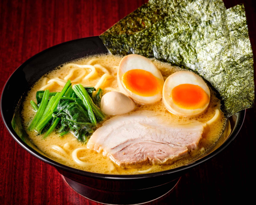

In [5]:
from fastdownload import download_url
dest = 'home_ramen.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

Searching for '醤油ラーメン'


/tmp/ipykernel_2196502/27701050.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


{'title': '醤油ラーメンといえばここ!福岡市で人気の"醤油ラーメン"15選 | RETRIP[リトリップ]', 'image': 'https://static.retrip.jp/article/34916/images/349164fedd2b6-f4cb-483c-85a8-799f92924206_l.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.ZQ0QBfCofObjYUQhKix0NAHaE7&pid=Api', 'url': 'https://rtrp.jp/articles/34916/', 'height': 1066, 'width': 1600, 'source': 'Bing'}


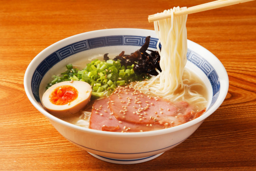

In [7]:
download_url(search_images('醤油ラーメン', max_images=1)[0], '醤油ラーメン.jpg', show_progress=False)
Image.open('醤油ラーメン.jpg').to_thumb(256,256)

In [8]:
searches = '家系ラーメン','醤油ラーメン'
path = Path('home_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for '家系ラーメン photo'


/tmp/ipykernel_2196502/27701050.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


{'title': '【名店】吉村家 家系ラーメンの総本山!圧倒的に本物な元祖の味わいに感動! | ハシビロの気まぐれグルメ探訪', 'image': 'https://hashibiro-gourmet.com/wp-content/uploads/2020/02/3AD6E728-8BF9-4393-82DE-17B776E54523.jpeg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.Y3if3J-mKKv37Gk4Is7IHwHaFj&pid=Api', 'url': 'https://hashibiro-gourmet.com/2020/02/22/yoshimuraya-iekei/', 'height': 1915, 'width': 2553, 'source': 'Bing'}
{'title': '横浜家系ラーメン 石神井商店 Pork bone soup ramen Syakujii Shotenの宅配・出前・デリバリーを注文 ...', 'image': 'https://d1ralsognjng37.cloudfront.net/a834c4a6-4e71-4f58-8fb3-a37bd7be5559.jpeg', 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP.swgZpx5W8tK7NfnSFPLhEwHaF7&pid=Api', 'url': 'https://www.ubereats.com/jp/tokyo/food-delivery/横浜家系ラーメン-石神井商店-pork-bone-soup-ramen-syakujii-shoten/Bn0519uSQL6At3_t-Ojh1w', 'height': 2304, 'width': 2880, 'source': 'Bing'}
{'title': 'とんこつ醤油ラーメン 横浜家系ラーメン「一二三家」 - ヨコハマ経済新聞', 'image': 'https://images.keizai.biz/hamakei/photonews/1627299560_b.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.g

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing 

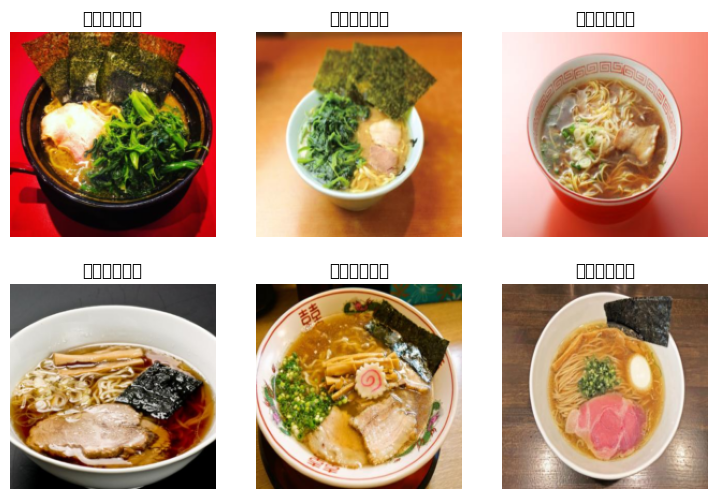

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we downloaded at the start:

In [14]:
is_home,_,probs = learn.predict(PILImage.create('home_ramen.jpg'))
print(f"This is a: {is_home}.")
print(f"Probability it's a home ramen: {probs[0]:.4f}")

This is a: 家系ラーメン.
Probability it's a home ramen: 1.0000


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.

In [15]:
learn.export('model.pkl')